In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

Data processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('India_city_hour.csv')
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Country
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN,India
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN,India
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN,India
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN,India
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN,India


In [4]:
#Chuyển cột Datetime từ String sang Datetime
from datetime import datetime

def stringToDateTime(string):
  return datetime.strptime(string,"%m/%d/%Y %H:%M")

india_time=map(stringToDateTime,df.Datetime)
df.Datetime=list(india_time)
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Country
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN,India
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN,India
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN,India
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN,India
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN,India


In [5]:
#Kiểm tra xem bao nhiêu phần trăm dữ liệu bị thiếu của mỗi feature trong từng thành phố
for i in df['City'].unique():
    temp=df[df['City']==i]
    print(f'{i}:\n{(temp.isna().sum()/len(temp))*100}\n') #Đơn vị phần trăm

Ahmedabad:
City            0.000000
Datetime        0.000000
PM2.5          35.406292
PM10           81.472029
NO             34.507802
NO2            33.522161
NOx            32.885126
NH3           100.000000
CO             34.507802
SO2            39.917414
O3             40.108317
Benzene        27.842795
Toluene        27.849021
Xylene         27.863546
AQI            35.837898
AQI_Bucket     35.837898
Country         0.000000
dtype: float64

Aizawl:
City            0.000000
Datetime        0.000000
PM2.5          20.671642
PM10           13.582090
NO              0.559701
NO2             1.977612
NOx             0.485075
NH3             0.522388
CO              0.485075
SO2             0.485075
O3             44.067164
Benzene        28.843284
Toluene        29.216418
Xylene        100.000000
AQI             5.671642
AQI_Bucket      5.671642
Country         0.000000
dtype: float64

Amaravati:
City           0.000000
Datetime       0.000000
PM2.5         15.585499
PM10          14

In [6]:
#Drop những thành phố có tỉ lệ missing value cao
for city in ['Ahmedabad','Patna','Lucknow','Jorapokhar','Gurugram','Chennai']:
    df.drop(df.index[df['City']==city],inplace=True)

#Drop những feature không liên quan đến chỉ số AQI
df = df.drop(['Country','AQI_Bucket','Benzene','Toluene','Xylene','Datetime'],axis=1)

df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
48192,Aizawl,42.00,51.28,4.27,0.97,6.66,19.88,0.37,3.35,NaN,NaN
48193,Aizawl,41.17,49.96,4.51,1.27,7.24,21.55,0.38,3.44,NaN,NaN
48194,Aizawl,24.97,42.04,7.25,5.45,14.56,20.25,0.50,3.93,6.95,NaN
48195,Aizawl,26.95,38.86,7.31,2.52,12.13,21.94,0.52,3.93,NaN,NaN
48196,Aizawl,17.42,37.15,7.25,1.58,11.14,25.71,0.49,4.36,NaN,NaN


In [7]:
#Fill missing value
for column in df.columns:
    df[column] = df[column].interpolate()
    
#Kiểm tra lại số missing value   
for col in df.columns:
  num_of_nan = df[col].isna().sum()
  percent_of_nan=num_of_nan*100/len(df)
  print(f"Column \"{col}\" has {num_of_nan} missing values ({percent_of_nan}%)")

Column "City" has 0 missing values (0.0%)
Column "PM2.5" has 0 missing values (0.0%)
Column "PM10" has 0 missing values (0.0%)
Column "NO" has 0 missing values (0.0%)
Column "NO2" has 0 missing values (0.0%)
Column "NOx" has 0 missing values (0.0%)
Column "NH3" has 0 missing values (0.0%)
Column "CO" has 0 missing values (0.0%)
Column "SO2" has 0 missing values (0.0%)
Column "O3" has 2 missing values (0.00044398861613188236%)
Column "AQI" has 15 missing values (0.003329914620989118%)


In [8]:
#Còn missing value nên tiếp tục fillna và kiểm tra lại
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)

for col in df.columns:
  num_of_nan = df[col].isna().sum()
  percent_of_nan=num_of_nan*100/len(df)
  print(f"Column \"{col}\" has {num_of_nan} missing values ({percent_of_nan}%)")

Column "City" has 0 missing values (0.0%)
Column "PM2.5" has 0 missing values (0.0%)
Column "PM10" has 0 missing values (0.0%)
Column "NO" has 0 missing values (0.0%)
Column "NO2" has 0 missing values (0.0%)
Column "NOx" has 0 missing values (0.0%)
Column "NH3" has 0 missing values (0.0%)
Column "CO" has 0 missing values (0.0%)
Column "SO2" has 0 missing values (0.0%)
Column "O3" has 0 missing values (0.0%)
Column "AQI" has 0 missing values (0.0%)


In [9]:
## Tính chỉ số AQI

# df["PM10_24hr_avg"] = df.groupby("City")["PM10"].rolling(window = 24, min_periods = 1).mean().values
# df["PM2.5_24hr_avg"] = df.groupby("City")["PM2.5"].rolling(window = 24, min_periods = 1).mean().values
# df["SO2_24hr_avg"] = df.groupby("City")["SO2"].rolling(window = 24, min_periods = 1).mean().values
# df["NH3_24hr_avg"] = df.groupby("City")["SO2"].rolling(window = 24, min_periods = 1).mean().values
# df["NOx_24hr_avg"] = df.groupby("City")["SO2"].rolling(window = 24, min_periods = 1).mean().values
# df["CO_8hr_max"] = df.groupby("City")["CO"].rolling(window = 8, min_periods = 1).max().values
# df["O3_8hr_max"] = df.groupby("City")["O3"].rolling(window = 8, min_periods = 1).max().values
# df["AQI_temp"] = df.groupby("City")["O3"].rolling(window = 8, min_periods = 1).max().values

# def get_PM25_subindex(x):
#     if x <= 30:
#         return x * 50 / 30
#     elif x <= 60:
#         return 50 + (x - 30) * 50 / 30
#     elif x <= 90:
#         return 100 + (x - 60) * 100 / 30
#     elif x <= 120:
#         return 200 + (x - 90) * 100 / 30
#     elif x <= 250:
#         return 300 + (x - 120) * 100 / 130
#     elif x > 250:
#         return 400 + (x - 250) * 100 / 130
#     else:
#         return 0
# df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

# def get_PM10_subindex(x):
#     if x <= 50:
#         #return x * 50/ 50
#         return x
#     elif x <= 100:
#         #return  50 + (x -  50) *  50 / 50
#         return x
#     elif x <= 250:
#         return 100 + (x - 100) * 100 / 150
#     elif x <= 350:
#         return 200 + (x - 250)
#     elif x <= 430:
#         return 300 + (x - 350) * 100 / 80
#     elif x > 430:
#         return 400 + (x - 430) * 100 / 80
#     else:
#         return 0
# df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

# def get_SO2_subindex(x):
#     if x <= 40:
#         return x * 50 / 40
#     elif x <= 80:
#         return 50 + (x - 40) * 50 / 40
#     elif x <= 380:
#         return 100 + (x - 80) * 100 / 300
#     elif x <= 800:
#         return 200 + (x - 380) * 100 / 420
#     elif x <= 1600:
#         return 300 + (x - 800) * 100 / 800
#     elif x > 1600:
#         return 400 + (x - 1600) * 100 / 800
#     else:
#         return 0
# df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

# def get_CO_subindex(x):
#     if x <= 1:
#         return x * 50 / 1
#     elif x <= 2:
#         return 50 + (x - 1) * 50 / 1
#     elif x <= 10:
#         return 100 + (x - 2) * 100 / 8
#     elif x <= 17:
#         return 200 + (x - 10) * 100 / 7
#     elif x <= 34:
#         return 300 + (x - 17) * 100 / 17
#     elif x > 34:
#         return 400 + (x - 34) * 100 / 17
#     else:
#         return 0
# df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

# def get_O3_subindex(x):
#     if x <= 50:
#         return x * 50 / 50
#     elif x <= 100:
#         return 50 + (x - 50) * 50 / 50
#     elif x <= 168:
#         return 100 + (x - 100) * 100 / 68
#     elif x <= 208:
#         return 200 + (x - 168) * 100 / 40
#     elif x <= 748:
#         return 300 + (x - 208) * 100 / 539
#     elif x > 748:
#         return 400 + (x - 400) * 100 / 539
#     else:
#         return 0
# df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

# def get_NOx_subindex(x):
#     if x <= 40:
#         return x * 50 / 40
#     elif x <= 80:
#         return 50 + (x - 40) * 50 / 40
#     elif x <= 180:
#         return 100 + (x - 80) * 100 / 100
#     elif x <= 280:
#         return 200 + (x - 180) * 100 / 100
#     elif x <= 400:
#         return 300 + (x - 280) * 100 / 120
#     elif x > 400:
#         return 400 + (x - 400) * 100 / 120
#     else:
#         return 0
# df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

# def get_NH3_subindex(x):
#     if x <= 200:
#         return x * 50 / 200
#     elif x <= 400:
#         return 50 + (x - 200) * 50 / 200
#     elif x <= 800:
#         return 100 + (x - 400) * 100 / 400
#     elif x <= 1200:
#         return 200 + (x - 800) * 100 / 400
#     elif x <= 1800:
#         return 300 + (x - 1200) * 100 / 600
#     elif x > 1800:
#         return 400 + (x - 1800) * 100 / 600
#     else:
#         return 0
# df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

# df.set_index((i for i in range(len(df))), inplace=True)

# for i in range(len(df)):
#     df['AQI_temp'][i]=max(df['PM2.5_SubIndex'][i],df['PM10_SubIndex'][i],df['SO2_SubIndex'][i],df['CO_SubIndex'][i],df['O3_SubIndex'][i])

# df.drop(["PM10_24hr_avg","PM2.5_24hr_avg","SO2_24hr_avg","NOx_24hr_avg","NH3_24hr_avg","CO_8hr_max","O3_8hr_max","PM2.5_SubIndex","PM10_SubIndex","SO2_SubIndex","CO_SubIndex","O3_SubIndex","NH3_SubIndex","NOx_SubIndex"],axis=1,inplace=True)

In [10]:
#Tách dữ liệu thành tập train và test

X_train_df=pd.DataFrame()
X_test_df=pd.DataFrame()

for city in df['City'].unique():
  df_temp=df.loc[df['City']==city]
  threshold=int(df_temp.shape[0]*0.8)

  train_temp=df_temp[:threshold]
  test_temp=df_temp[threshold:]

  X_train_df=pd.concat([X_train_df,train_temp],axis=0)
  X_test_df=pd.concat([X_test_df,test_temp],axis=0)

y_train_df=X_train_df['AQI'].values
y_test_df=X_test_df['AQI'].values

X_train_df.set_index((i for i in range(len(X_train_df))),inplace=True)
X_test_df.set_index((i for i in range(len(X_test_df))),inplace=True)

X_train_df.drop(['AQI'],axis=1,inplace=True)
X_test_df.drop(['AQI'],axis=1,inplace=True)

In [11]:
#One-hot encoding cho cột dữ liệu "City"

from sklearn.preprocessing import OneHotEncoder

oh_train=OneHotEncoder()
oh_test=OneHotEncoder()

oh_train_data=oh_train.fit_transform(X_train_df[['City']]).toarray()
oh_train_labels=oh_train.categories_

oh_test_data=oh_test.transform(X_test_df[['City']]).toarray()
oh_test_labels=oh_test.categories_

oh_train_df=pd.DataFrame(oh_train_data,columns=oh_train_labels[0])
oh_test_df=pd.DataFrame(oh_test_data,columns=oh_test_labels[0])

df_train_new=pd.concat((X_train_df,oh_train_df),axis=1)
df_train_new.drop(['City'],axis=1,inplace=True)

df_test_new=pd.concat((X_test_df,oh_test_df),axis=1)
df_test_new.drop(['City'],axis=1,inplace=True)

df_train_new.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Aizawl,...,Guwahati,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,42.00,51.28,4.27,0.97,6.66,19.88,0.37,3.35,6.9500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41.17,49.96,4.51,1.27,7.24,21.55,0.38,3.44,6.9500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24.97,42.04,7.25,5.45,14.56,20.25,0.50,3.93,6.9500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.95,38.86,7.31,2.52,12.13,21.94,0.52,3.93,5.7975,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.42,37.15,7.25,1.58,11.14,25.71,0.49,4.36,4.6450,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Scale dữ liệu về đoạn 0-1

from sklearn.preprocessing import MinMaxScaler

scaled_features=['PM2.5','PM10','SO2','CO','O3','NO','NO2','NOx','NH3']

y_train=np.reshape(y_train_df,(len(y_train_df),1))
values_train=df_train_new[scaled_features].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values_train = scaler.fit_transform(values_train)
df_train_new[scaled_features]=scaled_values_train

y_test=np.reshape(y_test_df,(len(y_test_df),1))
values_test=df_test_new[scaled_features].values

scaled_values_test = scaler.transform(values_test)
df_test_new[scaled_features]=scaled_values_test

In [13]:
#Chia dữ liệu thành các frame

def window_slide(train,label):
  window_size = 24
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(label[i,:])
  return X,Y

X_train,y_train=window_slide(df_train_new.values,y_train)
X_train = np.array(X_train)
y_train = np.array(y_train)
print('Y' ,y_train.shape)
print('X' ,X_train.shape)

X_test,y_test=window_slide(df_test_new.values,y_test)
X_test = np.array(X_test)
y_test = np.array(y_test)

# X_train_CNN và X_test_CNN dùng để train model kết hợp với CNN
X_train_CNN=X_train.reshape((X_train.shape[0],2,int(X_train.shape[1]/2),X_train.shape[2]))
X_test_CNN=X_test.reshape((X_test.shape[0],2,int(X_test.shape[1]/2),X_test.shape[2]))

print('Y' ,y_test.shape)
print('X' ,X_test.shape)

Y (360337, 1)
X (360337, 24, 29)
Y (90077, 1)
X (90077, 24, 29)


Modeling and training

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import optuna
from sklearn.metrics import mean_squared_error
from keras.layers import GRU
from keras.layers import SimpleRNN
import tensorflow as tf

def objective(trial):

    
  classifier = trial.suggest_categorical('classifier', ['LSTM', 'RNN','GRU'])
  batch_size=trial.suggest_int('batch_size',256,512)
  units=trial.suggest_int('units',64,128)
  filters=trial.suggest_int('filters',32,64)
    
  
  if classifier=='LSTM':
      model = Sequential()
      model.add(TimeDistributed(Conv1D(filters=filters, kernel_size=1, activation='relu'), input_shape=(None, X_train_CNN.shape[2], X_train_CNN.shape[3])))
      model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
      model.add(TimeDistributed(Flatten()))
      model.add(LSTM(units=units, activation='relu',return_sequences=True))
      model.add(LSTM(units=units, activation='relu'))
      model.add(Dense(1))
      model.compile(optimizer='adam', loss='mse')

      model.fit(X_train_CNN,y_train,epochs=20,batch_size=batch_size,verbose=1)
      y_pred=model.predict(X_test_CNN)
      return 1-mean_squared_error(y_test, y_pred)

  elif classifier=='RNN':
      model = Sequential()
      model.add(SimpleRNN(units=units, input_dim=X_train.shape[-1], input_length=X_train.shape[1],return_sequences=True))
      model.add(SimpleRNN(units=units-32))
      model.add(Dense(1))
      model.compile(optimizer='adam', loss='mse')
      model.fit(X_train,y_train,epochs=20,batch_size=batch_size,verbose=1)
      y_pred=model.predict(X_test)
      return 1-mean_squared_error(y_test, y_pred)
  else:
      model = Sequential()
      model.add(GRU(units=units, return_sequences=True, input_dim=X_train.shape[-1], input_length=X_train.shape[1]))
      model.add(GRU(units=units))
      model.add(Dense(1))
      model.compile(optimizer='adam', loss='mse')
      model.fit(X_train,y_train,epochs=20,batch_size=batch_size,verbose=1)
      y_pred=model.predict(X_test) 

      return 1-mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed,SimpleRNN
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf

units=117
batch_size=490
filters=59

# model = Sequential()
# model.add(SimpleRNN(units=units, input_dim=X_train.shape[-1], input_length=X_train.shape[1],return_sequences=True))
# model.add(SimpleRNN(units=units-32))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# model.fit(X_train,y_train,epochs=100,batch_size=batch_size,verbose=1)

model = Sequential()
model.add(TimeDistributed(Conv1D(filters=filters, kernel_size=1, activation='relu'), input_shape=(None, X_train_CNN.shape[2], X_train_CNN.shape[3])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model .add(LSTM(units=units, activation='relu',return_sequences=True))
model.add(LSTM(units=units, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_CNN,y_train,epochs=50,batch_size=batch_size,verbose=1)


2023-08-21 22:57:58.823210: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 22:57:59.333525: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-21 22:57:59.691987: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-08-21 22:57:59.692044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: iec
2023-08-21 22:57:59.692058: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: iec
2023-08-21 22:57:59.692187: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported versi

Epoch 1/10
736/736 [==============================] - 9s 10ms/step - loss: 2572.7954
Epoch 2/10
736/736 [==============================] - 8s 10ms/step - loss: 962.2157
Epoch 3/10
736/736 [==============================] - 8s 10ms/step - loss: 799.3546
Epoch 4/10
736/736 [==============================] - 8s 10ms/step - loss: 725.0791
Epoch 5/10
736/736 [==============================] - 8s 11ms/step - loss: 668.3928
Epoch 6/10
736/736 [==============================] - 8s 10ms/step - loss: 628.8358
Epoch 7/10
736/736 [==============================] - 8s 10ms/step - loss: 596.8250
Epoch 8/10
736/736 [==============================] - 8s 10ms/step - loss: 565.2227
Epoch 9/10
736/736 [==============================] - 8s 10ms/step - loss: 535.1807
Epoch 10/10
736/736 [==============================] - 8s 10ms/step - loss: 508.8577


In [15]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test_CNN)
mse = mean_squared_error(y_test, y_pred)
print('MSE: ',mse)

2815/2815 [==============================] - 3s 884us/step
MSE:  632.9983414479794


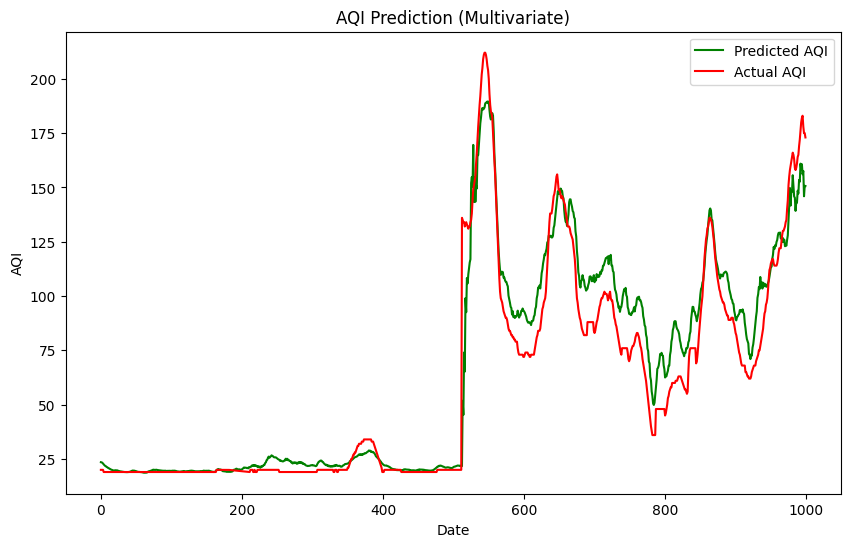

<Figure size 640x480 with 0 Axes>

In [16]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_pred[:1000,:], color= 'green',label = 'Predicted AQI')
plt.plot(y_test[:1000,:] , color = 'red',label = 'Actual AQI')
plt.title("AQI Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()
plt.savefig('graph.png')